<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/Capital_Asset_Pricing_Model_(CAPM)_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Capital Asset Pricing Model**:
\begin{equation}
 E[r_{a}] = r_{f} + \\beta_{a}(E[r_{m}]- r_{f})
\end{equation}

In [126]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
import yfinance as yf 

In [128]:
yf.pdr_override() 

In [129]:
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')

In [ ]:
AAPL =['AAPL'] # Accion Individual
WMT =['WMT'] # Accion Individual
AMZN =['AMZN'] # Accion Individual
KO =['KO'] # Accion Individual
JPM =['JPM'] # Accion Individual
CVX =['CVX'] # Accion Individual

stock_m = ['^GSPC'] # Mercado 

start = pd.to_datetime('2019-01-01') # Inicio 
end = pd.to_datetime('2022-10-17') # Fin

AAPL = pdr.get_data_yahoo(AAPL, start=start, end=end)['Adj Close']
WMT = pdr.get_data_yahoo(WMT, start=start, end=end)['Adj Close']
AMZN = pdr.get_data_yahoo(AMZN, start=start, end=end)['Adj Close']
KO = pdr.get_data_yahoo(KO, start=start, end=end)['Adj Close']
JPM = pdr.get_data_yahoo(JPM, start=start, end=end)['Adj Close']
CVX = pdr.get_data_yahoo(CVX, start=start, end=end)['Adj Close']


data_m = pdr.get_data_yahoo(stock_m, start=start, end=end)['Adj Close']

In [145]:
AAPL.tail()

Date
2022-10-10    140.187439
2022-10-11    138.749832
2022-10-12    138.110886
2022-10-13    142.753204
2022-10-14    138.150833
Name: Adj Close, dtype: float64

In [154]:
M_AAPL = AAPL.resample('M').last()
M_JPM = JPM.resample('M').last()
M_WMT = AAPL.resample('M').last()
M_KO = JPM.resample('M').last()
M_CVX = AAPL.resample('M').last()
M_AMZN = JPM.resample('M').last()

M_stock_m = data_m.resample('M').last()


data = pd.DataFrame({'AAPL':M_AAPL, 'JPM': M_JPM,'WMT': M_WMT,'KO': M_KO,'CVX': M_CVX,'AMZN': M_AMZN , 'Markt_Close': M_stock_m})
data.tail()

,AAPL,JPM,WMT,KO,CVX,AMZN,Markt_Close
Date,,,,,,,
2022-06-30,136.304245,110.632797,136.304245,110.632797,136.304245,110.632797,3785.379883
2022-07-31,162.015808,114.337029,162.015808,114.337029,162.015808,114.337029,4130.290039
2022-08-31,156.959625,112.721489,156.959625,112.721489,156.959625,112.721489,3955.000000
2022-09-30,137.971115,103.573334,137.971115,103.573334,137.971115,103.573334,3585.620117
2022-10-31,138.150833,111.190002,138.150833,111.190002,138.150833,111.190002,3583.070068


In [155]:
# Retornos Logaritmos 
data[['AAPL_Retonos','Markt_Ret',"JPM_Retornos","WMT_Retornos","KO_Retornos","CVX_Retornos","AMZN_Retornos"]] = np.log(data[['AAPL','Markt_Close',"JPM","WMT","KO","CVX","AMZN"]]/data[['AAPL','Markt_Close',"JPM","WMT","KO","CVX","AMZN"]].shift(1))
data.dropna(inplace=True)
data.tail()

,AAPL,JPM,WMT,KO,CVX,AMZN,Markt_Close,AAPL_Retonos,Markt_Ret,JPM_Retornos,WMT_Retornos,KO_Retornos,CVX_Retornos,AMZN_Retornos
Date,,,,,,,,,,,,,,
2022-06-30,136.304245,110.632797,136.304245,110.632797,136.304245,110.632797,3785.379883,-0.084937,-0.087652,-0.160612,-0.084937,-0.160612,-0.084937,-0.160612
2022-07-31,162.015808,114.337029,162.015808,114.337029,162.015808,114.337029,4130.290039,0.172804,0.087201,0.032934,0.172804,0.032934,0.172804,0.032934
2022-08-31,156.959625,112.721489,156.959625,112.721489,156.959625,112.721489,3955.000000,-0.031705,-0.043367,-0.014230,-0.031705,-0.014230,-0.031705,-0.014230
2022-09-30,137.971115,103.573334,137.971115,103.573334,137.971115,103.573334,3585.620117,-0.128944,-0.098049,-0.084640,-0.128944,-0.084640,-0.128944,-0.084640
2022-10-31,138.150833,111.190002,138.150833,111.190002,138.150833,111.190002,3583.070068,0.001302,-0.000711,0.070961,0.001302,0.070961,0.001302,0.070961


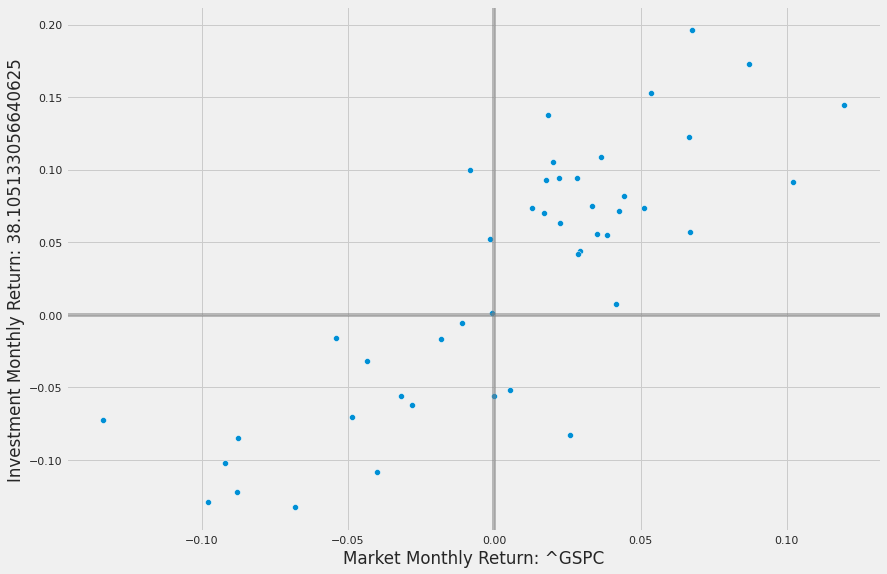

In [149]:
plt.figure(figsize = (13,9))

plt.axvline(0, color='grey', alpha = 0.5) 
plt.axhline(0, color='grey', alpha = 0.5)
sns.scatterplot(y = 'AAPL_Retonos', x = 'Markt_Ret', data = data)
plt.xlabel('Market Monthly Return: {}'.format(stock_m[0]))
plt.ylabel('Investment Monthly Return: {}'.format(AAPL[0]))
plt.show()

In [156]:
beta_form = (data[['AAPL_Retonos','Markt_Ret',"JPM_Retornos","WMT_Retornos","KO_Retornos","CVX_Retornos","AMZN_Retornos"]].cov()/data['Markt_Ret'].var()).iloc[0].iloc[1]
print('Beta from CAPM formula: ',beta_form.round(4))

Beta from CAPM formula:  1.3167


In [136]:
beta_reg, alpha = np.polyfit(x = data['Markt_Ret'] , y = data['AAPL_Retonos'] ,deg = 1)
print('Beta from Linear Regression: ',beta_reg.round(4))
print('Alpha: ', alpha.round(3))

Beta from Linear Regression:  1.3167
Alpha:  0.019


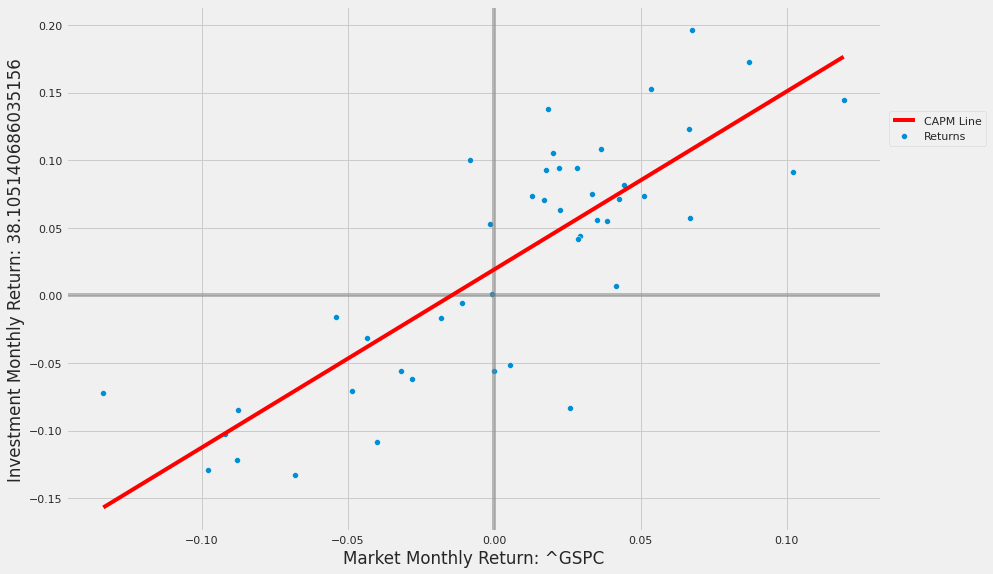

In [137]:
plt.figure(figsize = (13,9))

plt.axvline(0, color='grey', alpha = 0.5)
plt.axhline(0, color='grey', alpha = 0.5)

sns.scatterplot(y = 'AAPL_Retonos', x = 'Markt_Ret', data = data, label = 'Returns')
sns.lineplot(x = data['Markt_Ret'], y = alpha + data['Markt_Ret']*beta_reg, color = 'red', label = 'CAPM Line')



plt.xlabel('Market Monthly Return: {}'.format(stock_m[0]))
plt.ylabel('Investment Monthly Return: {}'.format(AAPL[0]))

plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0.)

plt.show()

In [138]:
def CAPM(AAPL,stock_m,start, end):
    
    AAPL = pdr.get_data_yahoo(AAPL, start=start, end=end)['Adj Close']
    data_m = pdr.get_data_yahoo(stock_m, start=start, end=end)['Adj Close']
    
    M_AAPL = AAPL.resample('M').last()
    M_stock_m = data_m.resample('M').last()
    
    data = pd.DataFrame({'AAPL':M_AAPL, 'Markt_Close': M_stock_m})
    data[['AAPL_Retonos','Markt_Ret']] = np.log(data[['AAPL','Markt_Close']]/data[['AAPL','Markt_Close']].shift(1))
    data.dropna(inplace=True)
    
    beta_form = (data[['AAPL_Retonos','Markt_Ret']].cov()/data['Markt_Ret'].var()).iloc[0].iloc[1] # Beta 
    beta_reg, alpha = np.polyfit(x = data['Markt_Ret'] , y = data['AAPL_Retonos'] ,deg = 1) # 
   

 
    print('\n')
    print(20*'==')
    print('Beta from formula: ',beta_form.round(4))
    print('Beta from Linear Regression: ',beta_reg.round(4))
    print('Alpha: ', alpha.round(3))
    print(20*'==')
    
    plt.figure(figsize = (13,9))
    
    plt.axvline(0, color='grey', alpha = 0.5)
    plt.axhline(0, color='grey', alpha = 0.5)

    sns.scatterplot(y = 'AAPL_Retonos', x = 'Markt_Ret', data = data, label = 'Returns')
    sns.lineplot(x = data['Markt_Ret'], y = alpha + data['Markt_Ret']*beta_reg, color = 'red', label = 'CAPM Line')

    plt.xlabel('Market Monthly Return: {}'.format(stock_m[0]))
    plt.ylabel('Investment Monthly Return: {}'.format(AAPL[0]))
    plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0.)

    plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Beta from formula:  1.2509
Beta from Linear Regression:  1.2509
Alpha:  0.01


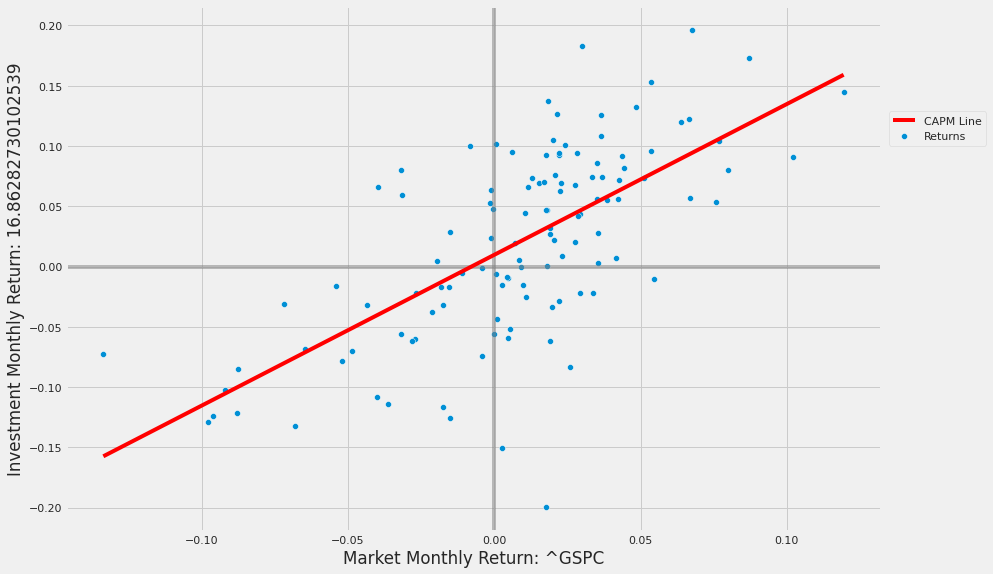

In [139]:
AAPL =['AAPL']
stock_m = ['^GSPC']

start = pd.to_datetime('2013-01-01') 
end = pd.to_datetime('2022-11-17')

CAPM(AAPL,stock_m,start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Beta from formula:  1.0243
Beta from Linear Regression:  1.0243
Alpha:  -0.011


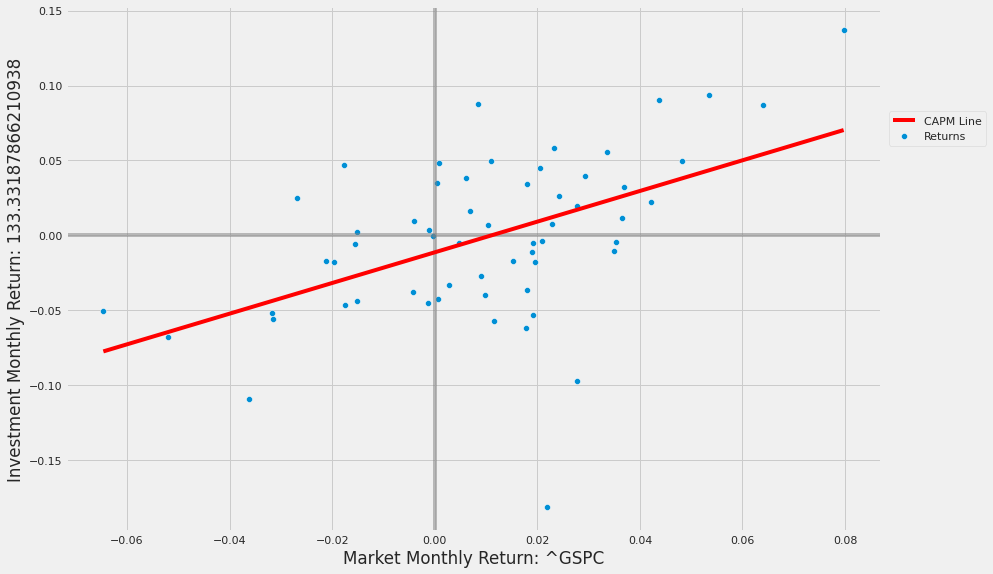

In [140]:
AAPL =['GE']
stock_m = ['^GSPC']

start = pd.to_datetime('2013-01-01') 
end = pd.to_datetime('2018-01-01')

CAPM(AAPL,stock_m,start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Beta from formula:  2.0556
Beta from Linear Regression:  2.0556
Alpha:  0.011


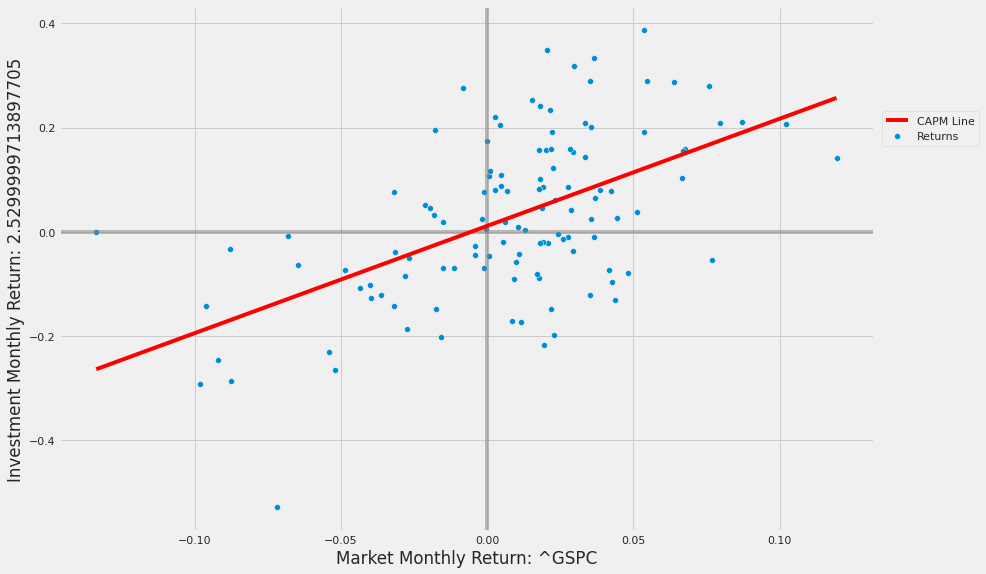

In [141]:
AAPL =['AMD']
stock_m = ['^GSPC']

start = pd.to_datetime('2013-01-01') 
end = pd.to_datetime('2022-11-17')

CAPM(AAPL,stock_m,start, end)

In [142]:
def CAPM_daily(AAPL,stock_m,start, end):
    
    AAPL = pdr.get_data_yahoo(AAPL, start=start, end=end)['Adj Close']
    data_m = pdr.get_data_yahoo(stock_m, start=start, end=end)['Adj Close']
    
    #M_AAPL = AAPL.resample('M').last()
    #M_stock_m = data_m.resample('M').last()
    
    data = pd.DataFrame({'AAPL':AAPL, 'Markt_Close': data_m})
    data[['AAPL_Retonos','Markt_Ret']] = np.log(data[['AAPL','Markt_Close']]/data[['AAPL','Markt_Close']].shift(1))
    data.dropna(inplace=True)
    
    beta_form = (data[['AAPL_Retonos','Markt_Ret']].cov()/data['Markt_Ret'].var()).iloc[0].iloc[1]
    beta_reg, alpha = np.polyfit(x = data['Markt_Ret'] , y = data['AAPL_Retonos'] ,deg = 1)
   

 
    print('\n')
    print(20*'==')
    print('Beta from formula: ',beta_form.round(4))
    print('Beta from Linear Regression: ',beta_reg.round(4))
    print('Alpha: ', alpha.round(3))
    print(20*'==')
    
    plt.figure(figsize = (13,9))
    
    plt.axvline(0, color='grey', alpha = 0.5)
    plt.axhline(0, color='grey', alpha = 0.5)

    sns.scatterplot(y = 'AAPL_Retonos', x = 'Markt_Ret', data = data, label = 'Returns')
    sns.lineplot(x = data['Markt_Ret'], y = alpha + data['Markt_Ret']*beta_reg, color = 'red', label = 'CAPM Line')

    plt.xlabel('Market Monthly Return: {}'.format(stock_m[0]))
    plt.ylabel('Investment Monthly Return: {}'.format(AAPL[0]))
    plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0.)

    plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Beta from formula:  1.1641
Beta from Linear Regression:  1.1641
Alpha:  0.0


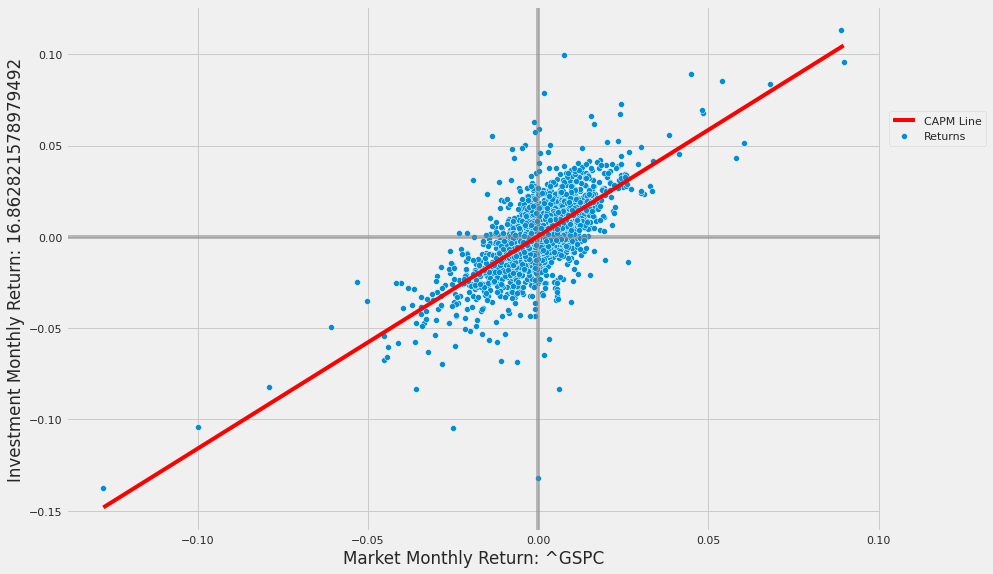

In [143]:
AAPL =['AAPL']
stock_m = ['^GSPC']

start = pd.to_datetime('2013-01-01') 
end = pd.to_datetime('2022-11-17')

CAPM_daily(AAPL,stock_m,start, end)